# Group Project: Crime Rate Exploration

Scientific Question:  How are the number of arrests correlated to the number of employed police officers?   

# Look at National trends in arrests for all crimes

In [1]:
#import all necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Get FBI API Key
API_KEY = api_keys.fbi_api_key

#Pull data from the website on trends for all crimes and all states from 2010 to 2019.

# base url for getting api data
base_url = "https://api.usa.gov/crime/fbi/sapi/"
#Create a list of states in order to request data from each state
stateAbbr = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
#Create a list of variables that we want to explore data for. In this case male and females
variable = 'all'
#declare the start and end year for the time period that we want to look at
since = '2010'
until = '2019'

#create an empty dataframe
crime_data = pd.DataFrame(columns=[])

#Create a for loop to request data for each state and for each variable for the offense that we would like to look at.
for i in stateAbbr:
    desired_endpoint = "api/arrest/states/offense/" + i + '/' + variable + '/' + since + '/' + until
    req = requests.get(base_url + desired_endpoint+'?api_key='+API_KEY).json()
    new = pd.DataFrame(req["data"])
    #Create new columns in the dataframe so that we know what data corresponds to each state and variable.
    new['State'] = i
    #Append the data from each request to the dataframe
    crime_data = crime_data.append(new)    

In [2]:
crime_data.head()

,value,data_year,month_num,key,State
0,2678,2010,0,Aggravated Assault,AL
1,4,2011,0,Aggravated Assault,AL
2,7,2012,0,Aggravated Assault,AL
3,10,2013,0,Aggravated Assault,AL
4,40,2014,0,Aggravated Assault,AL


In [3]:
#group data by year
crime_data_grouped_by_year = crime_data.groupby("data_year")
#find the sum of the values (arrested crimes) per year
sum_arrested_per_year = crime_data_grouped_by_year.sum()
sum_arrested_per_year.head()

,value,month_num
data_year,,
2010,10602026,0
2011,10012922,0
2012,9979508,0
2013,9613185,0
2014,9037194,0


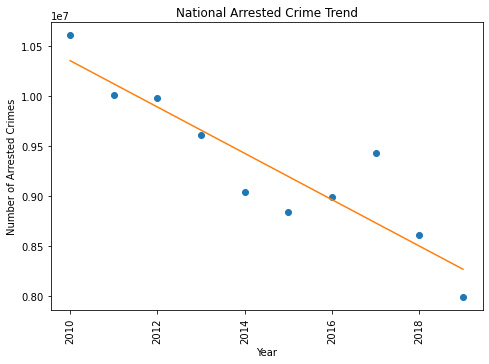

In [4]:
#Plot crime arrest data trend over the last 10 years
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=sum_arrested_per_year.index
y=sum_arrested_per_year['value']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#ax.scatter(x,y)
ax.set_title('National Arrested Crime Trend')
ax.set_ylabel("Number of Arrested Crimes")
ax.set_xlabel("Year")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

The trend shows that the number of arrested crimes, nationally, has been decreasing over the last 10 years (from 2010-2019) from 1.05x10^7 in 2010 to around 8.0 x 10^6 in 2019.  We want to know if this could have to do with a decreasing number of law enforcement employees. In order to investigate this, we need to pull data on the FBI website on police officer employment. 

# Look at National Trends in Number of Officers

In [5]:
#Pull data from the website on employment of officers by state
#https://api.usa.gov/crime/fbi/sapi/api/police-employment/states/MO/2010/2019?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv


# base url for getting api data
base_url = "https://api.usa.gov/crime/fbi/sapi/"
#Create a list of states in order to request data from each state
stateAbbr = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
#declare the start and end year for the time period that we want to look at
since = '2010'
until = '2019'

#create an empty dataframe
employment_data = pd.DataFrame(columns=[])

#Create a for loop to request data for each state and for each variable for the offense that we would like to look at.
for i in stateAbbr:
    desired_endpoint = "api/police-employment/states/" + i + '/' + since + '/' + until
    req = requests.get(base_url + desired_endpoint+'?api_key='+API_KEY).json()
    new = pd.DataFrame(req["results"])
    #Create new columns in the dataframe so that we know what data corresponds to each state and variable.
    new['State'] = i
    #Append the data from each request to the dataframe
    employment_data = employment_data.append(new)    

In [6]:
employment_data.head()

,data_year,civilian_ct,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,population,total_pe_ct,state_id,state_name,state_abbr,agency_count_pe_submitting,csv_header,pe_ct_per_1000,State
0,2010,5424,3354,808,4162,2070,10434,12504,4792630,16666,2,Alabama,AL,365,None,3.48,AL
1,2011,5701,3587,801,4388,2114,10668,12782,4815348,17170,2,Alabama,AL,378,None,3.57,AL
2,2012,5806,3584,809,4393,2222,10400,12622,4834334,17015,2,Alabama,AL,385,None,3.52,AL
3,2013,5818,3684,805,4489,2134,10681,12815,4845981,17304,2,Alabama,AL,379,None,3.57,AL
4,2014,5655,3591,829,4420,2064,10613,12677,4861676,17097,2,Alabama,AL,372,None,3.52,AL


In [7]:
#Group data by year
employment_data_grouped_by_year = employment_data.groupby("data_year")
#find the sum of the values (total_pe_ct) per year
sum_employment_per_year = employment_data_grouped_by_year.sum()
sum_employment_per_year.head()

,civilian_ct,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,population,total_pe_ct,state_id,agency_count_pe_submitting,pe_ct_per_1000
data_year,,,,,,,,,,,,
2010,329066,199803,88139,287942,129263,664497,793760,313562507,1081702,1466,16449,162.87
2011,329173,199657,98019,297676,129516,663545,793061,316558322,1090737,1466,16466,166.62
2012,324404,194626,86878,281504,129778,656673,786451,319057545,1067955,1466,16610,159.27
2013,320024,193776,85341,279117,126248,656741,782989,321306227,1062106,1466,16652,156.85
2014,325136,194201,86793,280994,130935,656210,787145,324076206,1068139,1466,16619,158.35


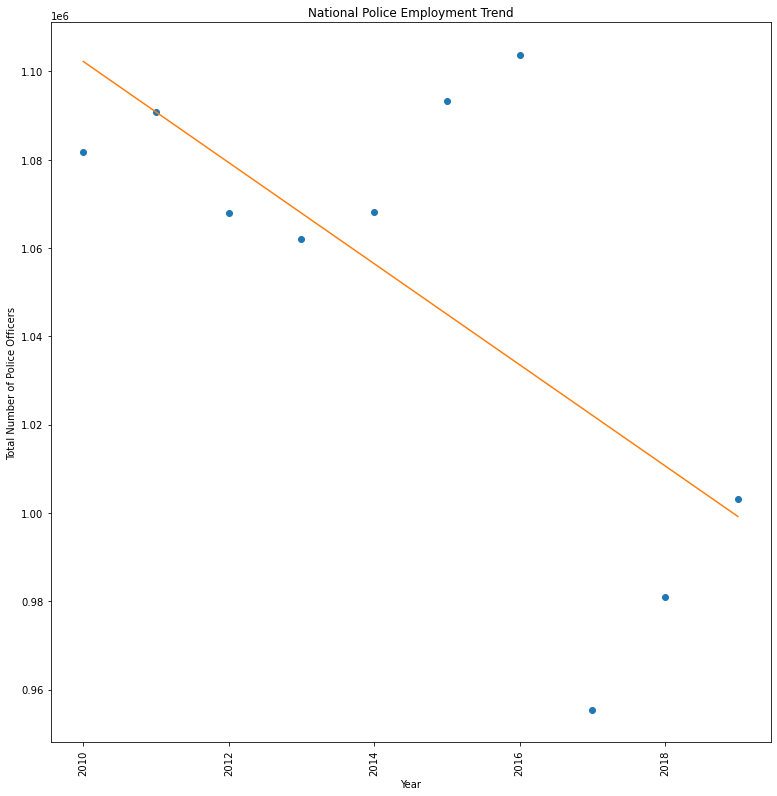

In [8]:
#Plot crime arrest data trend over the last 10 years
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=sum_employment_per_year.index
y=sum_employment_per_year['total_pe_ct']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#ax.scatter(x,y)
ax.set_title('National Police Employment Trend')
ax.set_ylabel("Total Number of Police Officers")
ax.set_xlabel("Year")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (3,2)
plt.show()

The trend in national total number of police officers also shows a decrease from 2010 to 2019. Total number of police employees went from 1.1 x 10^6 in 2010 to around 1.0 x 10^6 in 2019.  Next, we will look at the yearly correlation between national arrests and national police employment. 

# Find National Correlation Between Number of Officers and Arrests

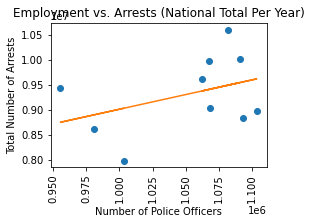

In [9]:
#Find correlation between number of officers and total number of arrests. 

#graph scatter plot of total officers per year vs. total arrests per year
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=sum_employment_per_year['total_pe_ct']
y=sum_arrested_per_year['value']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#ax.scatter(x,y)
ax.set_title('Employment vs. Arrests (National Total Per Year)')
ax.set_ylabel("Total Number of Arrests")
ax.set_xlabel("Number of Police Officers")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [10]:
#Find the correlation between the two
corr_employ_vs_arrests = sum_employment_per_year['total_pe_ct'].corr(sum_arrested_per_year['value'], method='pearson')
print(corr_employ_vs_arrests)

0.39254682119903445


The graph and correlation calculation shows a weak correlation between total national number of arrests and total national number of police officers.  0.39, however, is only a slight positive correlation.  We are going to now look at the correlation between these two if we look individually at each state.  This gives us a much better picture because it is a much smaller scale.  The data is available for each state and each year. 

In [11]:
#group crime dataset by state and year
crime_data_grouped_by_state_and_year= crime_data.groupby(['State', 'data_year']).sum()
crime_data_grouped_by_state_and_year.head(-1)


value  month_num
State data_year                  
AK    2010       41972          0
      2011       40214          0
      2012       29691          0
      2013       29569          0
      2014       25940          0
...                ...        ...
WY    2014       28874          0
      2015       29139          0
      2016       28374          0
      2017       28004          0
      2018       28385          0

[492 rows x 2 columns]

In [12]:
#group employment dataset by state and year
employment_data_grouped_by_state_and_year = employment_data.groupby(['State', 'data_year']).sum()
employment_data_grouped_by_state_and_year.head()

civilian_ct  female_civilian_ct  female_officer_ct  \
State data_year                                                       
AK    2010               730                 474                106   
      2011               710                 472                109   
      2012               690                 453                109   
      2013               634                 443                113   
      2014               691                 456                116   

                 female_total_ct  male_civilian_ct  male_officer_ct  \
State data_year                                                       
AK    2010                   580               256             1152   
      2011                   581               238             1215   
      2012                   562               237             1221   
      2013                   556               191             1248   
      2014                   572               235             1202   

                 male_total_ct  population  total_pe_ct  state_id  \
State data_year                                                     
AK    2010                1408      711456         1988         1   
      2011                1453      725910         2034         1   
      2012                1458      735190         2020         1   
      2013                1439      739005         1995         1   
      2014                1437      740644         2009         1   

                 agency_count_pe_submitting  pe_ct_per_1000  
State data_year                                              
AK    2010                               36            2.79  
      2011                               35            2.80  
      2012                               35            2.75  
      2013                               33            2.70  
      2014                               33            2.71

In [13]:
#Find correlation between total police officer count and total arrests now that it is grouped by state and year.
corr_total_pe_vs_arrests = crime_data_grouped_by_state_and_year['value'].corr(employment_data_grouped_by_state_and_year['total_pe_ct'], method='pearson')
print(corr_total_pe_vs_arrests)
#Look at length of each dataframe to make sure they have the same dimensions, otherwise correlation will not work properly.
print(len(employment_data_grouped_by_state_and_year['total_pe_ct']))
print(len(crime_data_grouped_by_state_and_year['value']))
#print(crime_data_grouped_by_state_and_year.loc['FL'])
#print(employment_data_grouped_by_state_and_year.loc['FL'])
#Printing this out shows that Florida is missing crime data from 2010 to 2016.  So, I will remove FL from the dataset for both employment and crime data. 
#Remove data from employment dataframe for florida from 2010 to 2016 so that each dataframe has a matching number of elements for correlation
new_grouped_employment_df=employment_data_grouped_by_state_and_year.drop(index='FL',level=0)
new_grouped_crime_df=crime_data_grouped_by_state_and_year.drop(index='FL',level=0)

0.8658015192016927
500
493


In [14]:
#Look at length of each new dataframe to make sure they have the same dimensions now. 
print(len(new_grouped_employment_df['total_pe_ct']))
print(len(new_grouped_crime_df['value']))

490
490


In [15]:
#Calculate Coefficient now that lengths of dataframes match
new_corr_total_pe_vs_arrests = new_grouped_crime_df['value'].corr(new_grouped_employment_df['total_pe_ct'], method='pearson')
print(new_corr_total_pe_vs_arrests)

0.8716575807715448


The correlation between total arrests and total police employees per state per year is very high (0.87). Next, I will graph these two variables as a scatter plot to visualize the relationship. 

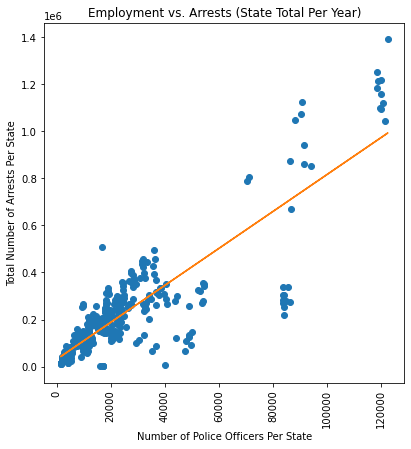

In [16]:
# Graph it as a scatter plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=new_grouped_employment_df['total_pe_ct']
y=new_grouped_crime_df['value']
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
#create scatter plot
plt.plot(x, m*x + b)
#print(new_grouped_crime_df.index)
#colors = {'2010':'red','2011':'orangered','2012':'gold','2013':'yellow','2014':'greenyellow','2015':'green','2016':'cyan','2017':'blue','2018':'indigo','2019':'violet'}
#ax.scatter(x,y, c=new_grouped_crime_df['index'].map(colors))
#ax.scatter(x,y)
ax.set_title('Employment vs. Arrests (State Total Per Year)')
ax.set_ylabel("Total Number of Arrests Per State")
ax.set_xlabel("Number of Police Officers Per State")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()


The visualization shows a good representation of the direct relationship and strong correlation between these two variables. However, it tells us nothing about if the arrest count is due to more officers.  In fact, it is likely due to the fact that states with higher populations have more officers and states with higher populations also have more arrests.

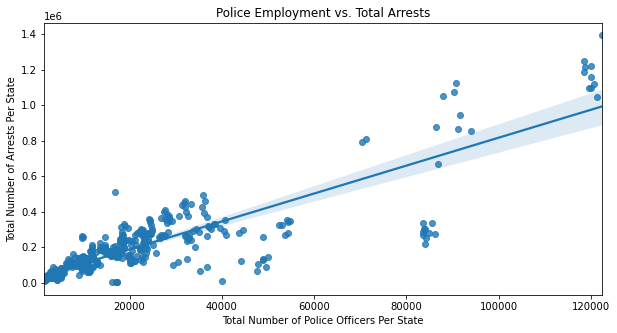

In [17]:
#try with seaborn to see another type of visualization of this same dataset
import seaborn as sns
plt.figure(figsize=(10,5))
sns.regplot(x=new_grouped_employment_df['total_pe_ct'], y=new_grouped_crime_df['value'])
#regplot function draws a scatterplot of two variables, x and y, and then fits the regression model y ~ x and plots the resulting regression line and a 95% confidence interval for that regression 
#Add the plot title
plt.title('Police Employment vs. Total Arrests')
# Set x-axis label
plt.xlabel('Total Number of Police Officers Per State')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per State')
plt.show()

We can also colorcode each state to get an understanding of what states have the most arrests and most officers.  This may give a clue to if it is population based. 

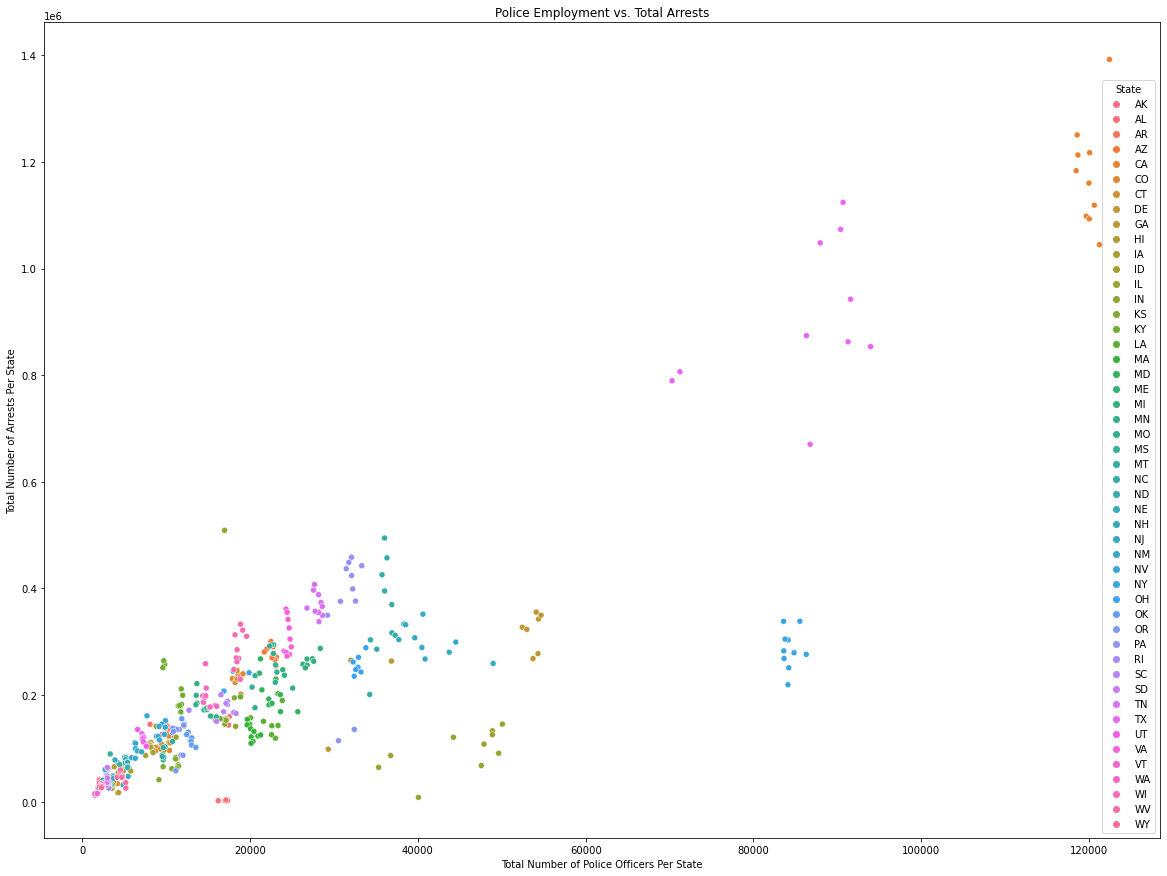

In [18]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=new_grouped_employment_df['total_pe_ct'], y=new_grouped_crime_df['value'], hue=new_grouped_crime_df.index.get_level_values("State"), legend='full')
plt.title('Police Employment vs. Total Arrests')
# Set x-axis label
plt.xlabel('Total Number of Police Officers Per State')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per State')
plt.show()

After including the color code by state and key, we can see that California and Texas have very high total number of officers and total number of arrests (although this is hard to tell because the colors are very similar for many states).  If we now look at correlations between total number of officers per 1000 people, it may give us a better picture of the relationship between officers and arrests. 

# Correlate Arrests Made With Number of Officers Per 1000 People

In [19]:
#Calculate correlation coefficient
new_corr_tot_pe_per_1000_vs_arrests = new_grouped_crime_df['value'].corr(new_grouped_employment_df['pe_ct_per_1000'], method='pearson')
print(new_corr_tot_pe_per_1000_vs_arrests)

0.15358910826691985


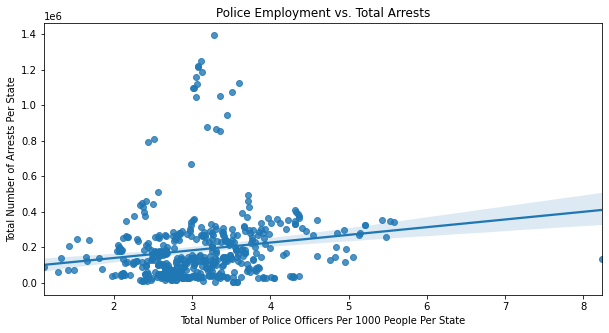

In [20]:
#try with seaborn to color code
import seaborn as sns
plt.figure(figsize=(10,5))
sns.regplot(x=new_grouped_employment_df['pe_ct_per_1000'], y=new_grouped_crime_df['value'])
#regplot function draws a scatterplot of two variables, x and y, and then fits the regression model y ~ x and plots the resulting regression line and a 95% confidence interval for that regression
#Add the x axis title 
#Add the y axis title

plt.title('Police Employment vs. Total Arrests')
# Set x-axis label
plt.xlabel('Total Number of Police Officers Per 1000 People Per State')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per State')
plt.show()

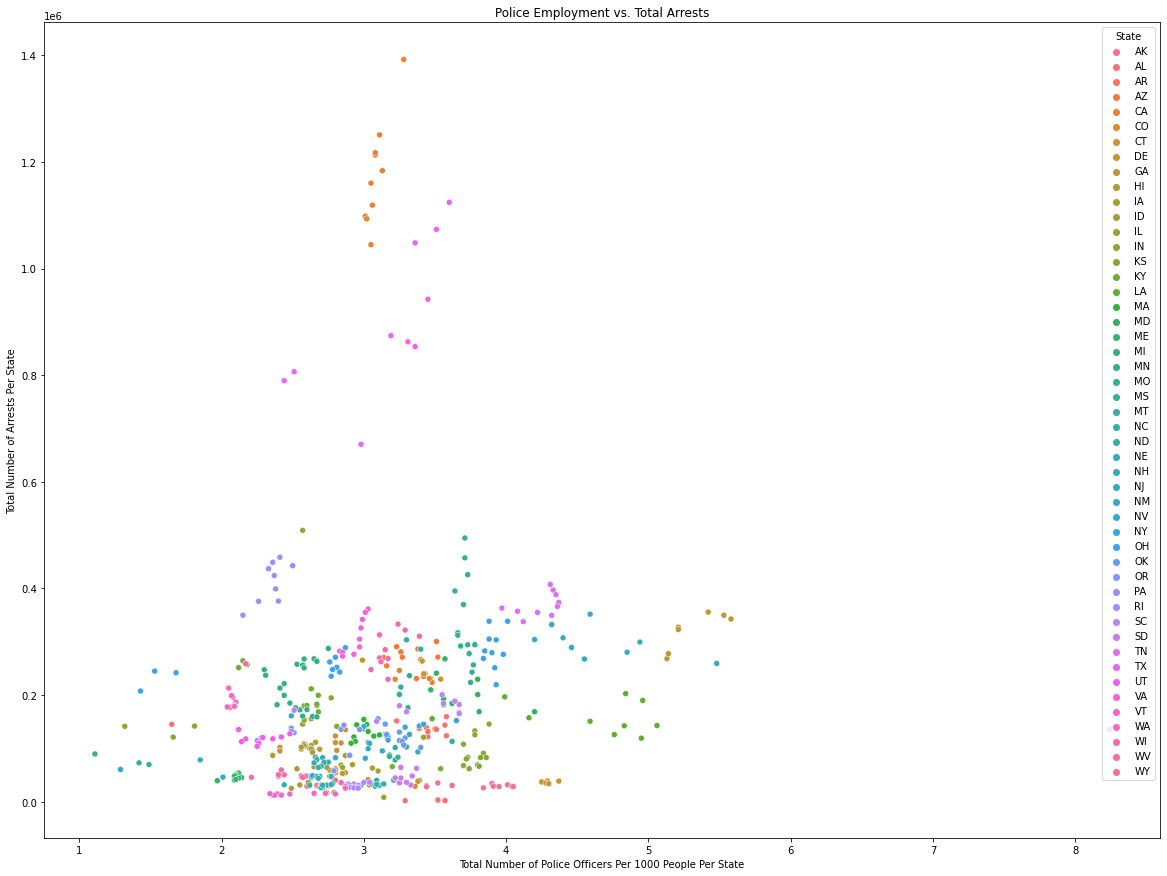

In [21]:
x=new_grouped_employment_df['pe_ct_per_1000']
y=new_grouped_crime_df['value']
plt.figure(figsize=(20,15))
sns.scatterplot(x=new_grouped_employment_df['pe_ct_per_1000'], y=new_grouped_crime_df['value'], hue=new_grouped_crime_df.index.get_level_values("State"), legend='full')
plt.title('Police Employment vs. Total Arrests')
# Set x-axis label
plt.xlabel('Total Number of Police Officers Per 1000 People Per State')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per State')
plt.show()

The correlation between the total number of police officers per 1000 people per state and total number of arrests per state is much lower (0.15) and only weakly positive.  From the color coded graph above, we can see that states like California and Texas have a high number of arrests, but do not have a particularly high number of officers per 1000 people. So, it seems that the total number of arrests is again more correlated to state population. We can run a correlation test between these two variables. 

# Correlate Number of Arrests Per State to Population


In [22]:
#Calculate Coefficient 
new_corr_tot_pop_vs_arrests = new_grouped_crime_df['value'].corr(new_grouped_employment_df['population'], method='pearson')
print(new_corr_tot_pop_vs_arrests)

0.9007886842849476


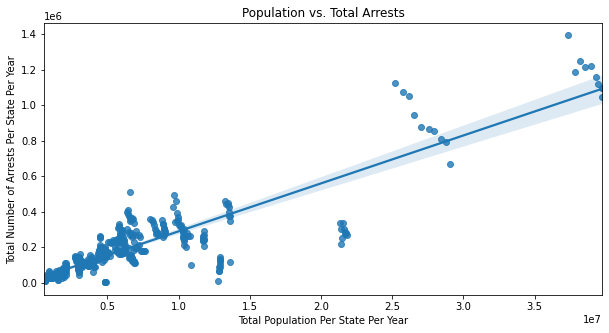

In [23]:
#Graph It
import seaborn as sns
plt.figure(figsize=(10,5))
sns.regplot(x=new_grouped_employment_df['population'], y=new_grouped_crime_df['value'])
#regplot function draws a scatterplot of two variables, x and y, and then fits the regression model y ~ x and plots the resulting regression line and a 95% confidence interval for that regression
#Add the x axis title 
#Add the y axis title

plt.title('Population vs. Total Arrests')
# Set x-axis label
plt.xlabel('Total Population Per State Per Year')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per State Per Year')
plt.show()

This shows that there is in fact a very high correlation between the number of arrests per state per year and the total population of the state.  What if we now look at the total number of police employees per 1000 people vs the total number of arrests per 1000 people.  This should be well correlated if it adding officers improves the number of arrests.  

In [24]:
#What is the relationship between total number of officers per 1000 people and total arrests per 1000 people?
new_grouped_crime_df['arrest_count_per_pop'] = new_grouped_crime_df['value']/(new_grouped_employment_df['population']/1000)
new_grouped_crime_df.head()
#Calculate correlation between 
corr_police_by_pop_vs_arrests_by_pop = new_grouped_employment_df['pe_ct_per_1000'].corr(new_grouped_crime_df['arrest_count_per_pop'], method='pearson')
print(corr_police_by_pop_vs_arrests_by_pop)

0.1614415586063185


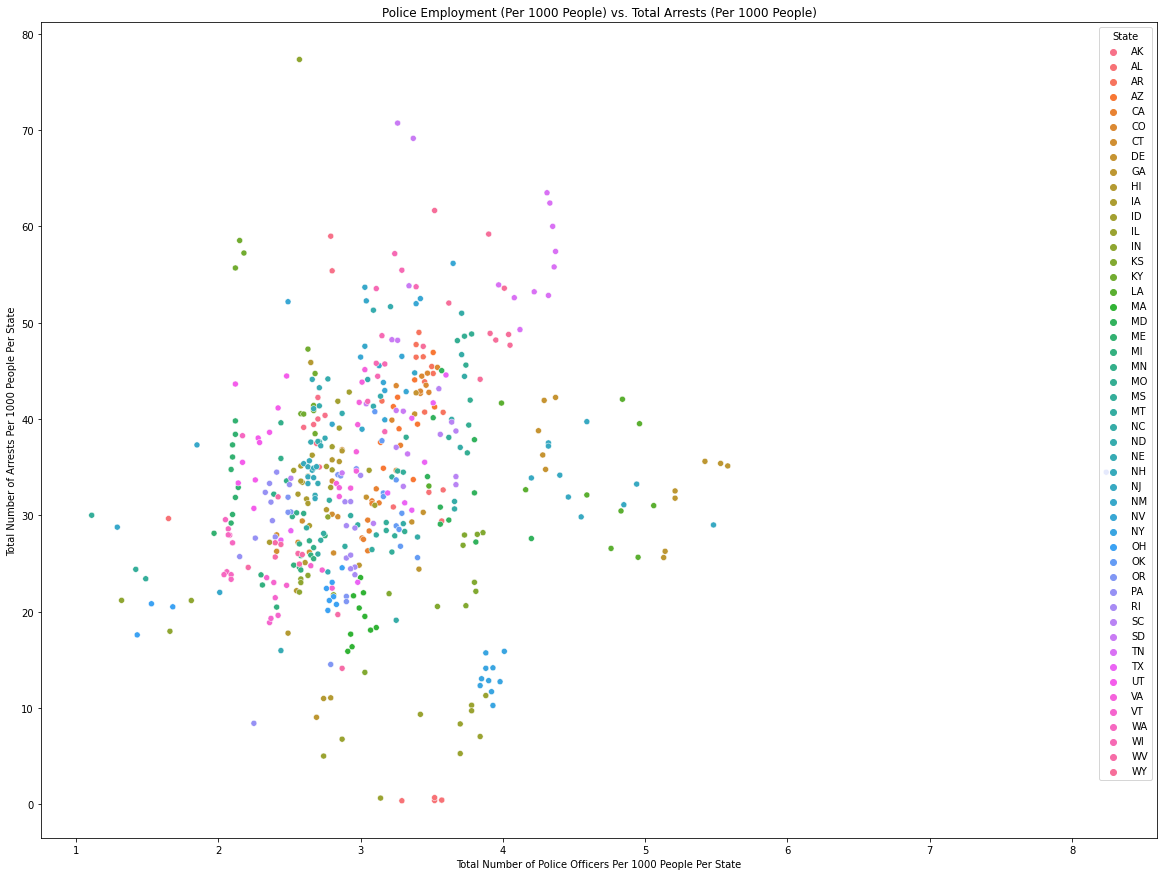

In [25]:
#Graph arrests per 1000 people vs. officers per 1000 people
plt.figure(figsize=(20,15))
sns.scatterplot(x=new_grouped_employment_df['pe_ct_per_1000'], y=new_grouped_crime_df['arrest_count_per_pop'], hue=new_grouped_crime_df.index.get_level_values("State"), legend='full')
plt.title('Police Employment (Per 1000 People) vs. Total Arrests (Per 1000 People)')
# Set x-axis label
plt.xlabel('Total Number of Police Officers Per 1000 People Per State')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per 1000 People Per State')
plt.show()

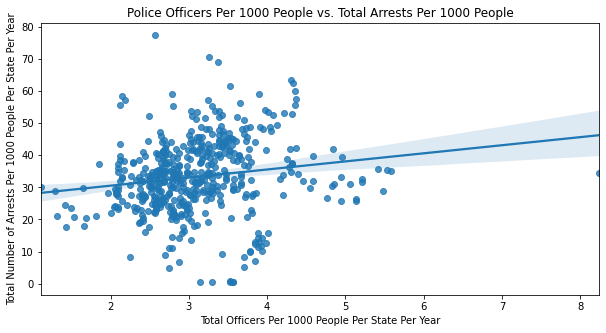

In [26]:
plt.figure(figsize=(10,5))
sns.regplot(x=new_grouped_employment_df['pe_ct_per_1000'], y=new_grouped_crime_df['arrest_count_per_pop'])
#regplot function draws a scatterplot of two variables, x and y, and then fits the regression model y ~ x and plots the resulting regression line and a 95% confidence interval for that regression
#Add the x axis title 
#Add the y axis title

plt.title('Police Officers Per 1000 People vs. Total Arrests Per 1000 People')
# Set x-axis label
plt.xlabel('Total Officers Per 1000 People Per State Per Year')
# Set y-axis label
plt.ylabel('Total Number of Arrests Per 1000 People Per State Per Year')
plt.show()

The correlation between the total officers per capita for each state and each year and the total number of arrests per capita for each state and each year are only weakly correlated. (0.16). We can look individually at states with a bar graph to see which states have the lowest arrest rates per 1000 people and the highest police officer count per 1000 people. 

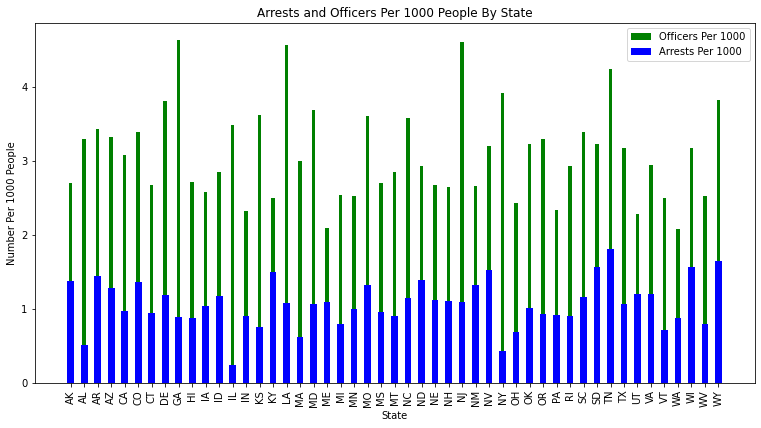

In [27]:
# What states have the lowest arrest rates per 1000 people? What about the highest police officer count per 1000 people?
crime_data.head()
employment_data.head()
employment_data["pop_per_thousands"] = employment_data["population"]/1000
new_employment_data = employment_data[employment_data.State != 'FL']
new_crime_data = crime_data[crime_data.State != 'FL']
#new_crime_data["arrests_per_thousands"] = new_crime_data["value"]/new_employment_data["pop_per_thousands"]
grouped_crime_data = new_crime_data.groupby("State").mean()
grouped_employment_data=new_employment_data.groupby("State").mean()
grouped_crime_data.head()
grouped_crime_data['arrests_per_1000'] = grouped_crime_data['value']/grouped_employment_data['pop_per_thousands']

#Create a Bar Plot
#fig = plt.figure(figsize=(10,5))
#ax = fig.add_axes([0,0,1,1])
#ax.bar(grouped_crime_data.index,grouped_crime_data['arrests_per_1000'])
#ax.set_title('Arrests Per 1000 People By State')
#ax.set_ylabel("Arrests Per 1000 People")
#ax.set_xlabel("State")
#plt.xticks(rotation=90)
#plt.show()


fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(grouped_crime_data.index, grouped_employment_data['pe_ct_per_1000'], color = 'g', width = 0.25)
#ax.bar(grouped_crime_data.index, grouped_crime_data['arrests_per_1000'], bottom=grouped_employment_data['pe_ct_per_1000'], color = 'b', width = 0.25)
ax.bar(grouped_crime_data.index, grouped_crime_data['arrests_per_1000'], color = 'b', width = 0.5)
ax.set_title('Arrests and Officers Per 1000 People By State')
ax.set_ylabel("Number Per 1000 People")
ax.set_xlabel("State")
plt.xticks(rotation=90)
ax.legend(labels=['Officers Per 1000', 'Arrests Per 1000'])
plt.show()


The bar graph shows that all states have very similar police employee count per 1000 people (between 2 and 4), but interestingly some states like Illinois and New York have relatively high officer count per 1000 people, but low arrest count per 1000 people. 

In [28]:
grouped_employment_data.head()

,data_year,civilian_ct,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,population,total_pe_ct,state_id,agency_count_pe_submitting,pe_ct_per_1000,pop_per_thousands
State,,,,,,,,,,,,,,
AK,2014.5,696.7,454.5,113.5,568.0,242.2,1184.5,1426.7,736684.8,1994.7,1.0,33.4,2.708,736.6848
AL,2014.5,5339.1,3340.6,791.3,4131.9,1998.5,9897.6,11896.1,4864226.8,16028.0,2.0,373.2,3.298,4864.2268
AR,2014.5,3746.1,2259.1,570.5,2829.6,1487.0,5953.3,7440.3,2996010.7,10269.9,3.0,279.2,3.427,2996.0107
AZ,2014.5,9848.7,5296.7,1368.7,6665.4,4552.0,11421.4,15973.4,6820561.7,22638.8,5.0,113.7,3.324,6820.5617
CA,2014.5,40989.0,25886.0,10351.1,36237.1,15103.0,68648.0,83751.0,38869566.4,119988.1,6.0,737.6,3.087,38869.5664


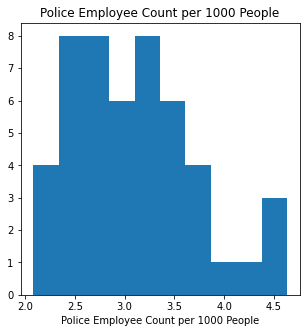

In [29]:
#Show a histogram of pe_ct_per_1000
plt.hist(grouped_employment_data['pe_ct_per_1000'])
plt.title("Police Employee Count per 1000 People")
plt.xlabel("Police Employee Count per 1000 People")
plt.show()

# Summary of Findings 

We wanted to understand how the number of officers correlated to the number of arrests.  When looking at trends over a 10 year period (2010-2019), the number of arrests and the number of total employed police officers nationally have both been declining. When you look at the sum of number of arrests vs. the total number of officers for the entire nation over the 10 year period 2010-2019, the correlation was 0.39, so there was a small correlation between total number of police officers and total number of arrests. 

When we break up data into individual states, there is a strong correlation (0.87) between the total number of police officers per state and the total number of arrests per state.  However, this is likely due population of each state.  When a state has a larger population, then there are more arrests and more police officers. 

If we look at the correlation between the total number of arrests and number of police officers per 1000 people, we actually see a much smaller correlation (0.154). Also, if we look at the correlation between the total number of police officers per 1000 people and the total number of arrests per 1000 people, the results is a slightly positive correlation (0.14). There is a 0.901 correlation, however, between population and number of arrests. This is showing that arrests is much more correlated to general population then the number of officers per 1000 people. If we look individually at states, we see states like New York have a relatively high number of officers per capita but a relatively low number of arrests per capita. 

We would need a lot more research to draw any conclusions.  Better documentation of the dataset would be very helpful.  We did a lot of research and then realized that it may have been better to look at the total officer count instead of the total pe count, which we believe just may be police employees.  Also, we don't know if some officers have more employees that work part time vs. other offices.  

#  Police Employment Gender Data

Here we will begin to analyze police employee gender demographics to determine whether there is a correlation between the percentage of female police officers and arrest data.

In [30]:
employment_data["female_total_ct"].sum()+employment_data["male_total_ct"].sum()

10507120

In [31]:
employment_data["total_pe_ct"].sum()

10507120

Since the total female employee count plus the total male employee count is equal to the total employee count, we can confirm that all emnployees were categorized as either female or male.

Next, we create a dataframe for employee gender demographics grouped by year and add a new column for percentage of employees who are female and plot the data.

In [32]:
employment_data_grouped_by_year = employment_data.groupby("data_year")

sum_female_employees_by_year = employment_data_grouped_by_year["female_total_ct"].sum()

sum_male_employees_by_year = employment_data_grouped_by_year["male_total_ct"].sum()

sum_employment_by_year = employment_data_grouped_by_year["total_pe_ct"].sum()

percent_female_employees_by_year = sum_female_employees_by_year / sum_employment_by_year * 100

employment_gender_demo_by_year = pd.DataFrame({"Total Female Employees":sum_female_employees_by_year,
                                               "Total Male Employees":sum_male_employees_by_year,
                                               "Total Employees":sum_employment_by_year,
                                               "Percentage Female Employees":percent_female_employees_by_year})

employment_gender_demo_by_year.index.name = "Year"

employment_gender_demo_by_year.style.format({"Percentage Female Employees":"{:.2f}"})

,Total Female Employees,Total Male Employees,Total Employees,Percentage Female Employees
Year,,,,
2010,287942,793760,1081702,26.62
2011,297676,793061,1090737,27.29
2012,281504,786451,1067955,26.36
2013,279117,782989,1062106,26.28
2014,280994,787145,1068139,26.31
2015,286780,806562,1093342,26.23
2016,293184,810505,1103689,26.56
2017,256254,699207,955461,26.82
2018,262992,717891,980883,26.81


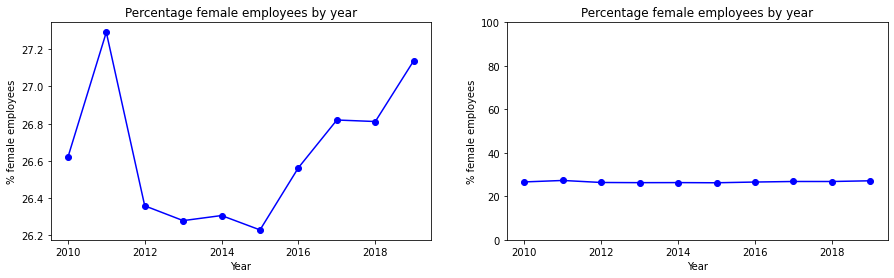

In [33]:
import matplotlib.pyplot as plt
from matplotlib import cm
fig, ax = plt.subplots (1, 2, figsize=(15,4), sharey = False)
ax[0].plot(employment_gender_demo_by_year.index, employment_gender_demo_by_year["Percentage Female Employees"],marker="o",color = "b")
ax[1].plot(employment_gender_demo_by_year.index, employment_gender_demo_by_year["Percentage Female Employees"],marker="o",color = "b")
ax[0].set_title("Percentage female employees by year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("% female employees")
ax[1].set_ylim([0, 100])
ax[1].set_title("Percentage female employees by year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("% female employees")
plt.show()
fig.savefig("percent_female_employees_by_year.png")

Using the default range on the y-axis, it looks like the percentage of employees who are female has varied drastically over the 10-year period. However, the default range is roughly 26.15% to 27.4%. Using a scale of 0% to 100%, the percentage appears to have stayed fairly uniform over the 10-year period.

In [34]:
employment_data_grouped_by_state_and_year = employment_data.groupby(["state_abbr", "data_year"])

sum_female_employees_by_state_and_year = employment_data_grouped_by_state_and_year["female_total_ct"].sum()

sum_male_employees_by_state_and_year = employment_data_grouped_by_state_and_year["male_total_ct"].sum()

sum_employment_by_state_and_year = employment_data_grouped_by_state_and_year["total_pe_ct"].sum()

percent_female_employees_by_state_and_year = sum_female_employees_by_state_and_year / sum_employment_by_state_and_year * 100

employment_gender_demo_by_state_and_year = pd.DataFrame({"Total Female Employees":sum_female_employees_by_state_and_year,
                                               "Total Male Employees":sum_male_employees_by_state_and_year,
                                               "Total Employees":sum_employment_by_state_and_year,
                                               "Percentage Female Employees":percent_female_employees_by_state_and_year})

employment_gender_demo_by_state_and_year.index.name = None

employment_gender_demo_by_state_and_year.style.format({"Percentage Female Employees":"{:.2f}"})
employment_gender_demo_by_state_and_year.head()

Total Female Employees  Total Male Employees  \
state_abbr data_year                                                 
AK         2010                          580                  1408   
           2011                          581                  1453   
           2012                          562                  1458   
           2013                          556                  1439   
           2014                          572                  1437   

                      Total Employees  Percentage Female Employees  
state_abbr data_year                                                
AK         2010                  1988                    29.175050  
           2011                  2034                    28.564405  
           2012                  2020                    27.821782  
           2013                  1995                    27.869674  
           2014                  2009                    28.471877

## Police Employee Gender vs. Arrests
I calculated the correlation coefficient between the number of arrests and percentage of female employees--both grouped by state and year--and found an insignificant (i.e., very weak) negative correlation.

In [35]:
corr_total_pe_gender_vs_arrests = crime_data_grouped_by_state_and_year["value"].corr(employment_gender_demo_by_state_and_year['Percentage Female Employees'], method='pearson')
print(corr_total_pe_gender_vs_arrests)

-0.0015942898380078819


In [36]:
from scipy import stats

In [37]:
print(len(crime_data_grouped_by_state_and_year["value"]))
print(len(employment_gender_demo_by_state_and_year['Percentage Female Employees']))

493
500


Since we already know that Florida is missing crime data from 2010 to 2016 and have an an arrest dataframe that excludes these missing values, we just need to exclude the corresponding values from the employment data.

In [38]:
new_gender_employment_df=employment_gender_demo_by_state_and_year.drop(index="FL",level=0)
print(len(new_gender_employment_df['Percentage Female Employees']))
print(len(new_grouped_crime_df['value']))

490
490


Now that the lengths match, the correlation coefficient and p-value can be calculated.

In [39]:
a = new_grouped_crime_df["value"]
b = new_gender_employment_df['Percentage Female Employees']
stats.pearsonr(a, b)

(0.20774526394129955, 3.5250665241150695e-06)

The recalculated correlation coefficient is approximately 0.22, and the p-value is about 3.53 x 10^-7, or 0.000003.53. The new calculations show a weak positive correlation between number of arrests and percentage of female employees. This contradicts the previous calculation, and there is a very strong p-value. 

## Police Officer Gender Data

The previous section analyzed gender data for all police department employees. This secion will analyze data for police officers only, not civilian employees, to see if there is a stronger correlation between police officer gendder and number of arrests.

Because the data frame did not include a column for total officer count, the sum of total female officer count and total male officer count needs to be calculated for use as the denominator in calculating the percentage of officers who are female.

In [40]:
employment_data["female_officer_ct"].sum()+employment_data["male_officer_ct"].sum()

7322626

In [41]:
employment_data_grouped_by_year = employment_data.groupby("data_year")

sum_female_officers_by_year = employment_data_grouped_by_year["female_officer_ct"].sum()

sum_male_officers_by_year = employment_data_grouped_by_year["male_officer_ct"].sum()

sum_officers_by_year = sum_female_officers_by_year + sum_male_officers_by_year

percent_female_officers_by_year = sum_female_officers_by_year / sum_officers_by_year * 100

officer_gender_demo_by_year = pd.DataFrame({"Total Female Officers":sum_female_officers_by_year,
                                               "Total Male Officers":sum_male_officers_by_year,
                                               "Total Officers":sum_officers_by_year,
                                               "Percentage Female Officers":percent_female_officers_by_year})

officer_gender_demo_by_year.index.name = "Year"

officer_gender_demo_by_year.style.format({"Percentage Female Officers":"{:.2f}"})

,Total Female Officers,Total Male Officers,Total Officers,Percentage Female Officers
Year,,,,
2010,88139,664497,752636,11.71
2011,98019,663545,761564,12.87
2012,86878,656673,743551,11.68
2013,85341,656741,742082,11.50
2014,86793,656210,743003,11.68
2015,88753,673139,761892,11.65
2016,90640,674440,765080,11.85
2017,83186,585654,668840,12.44
2018,86242,601620,687862,12.54


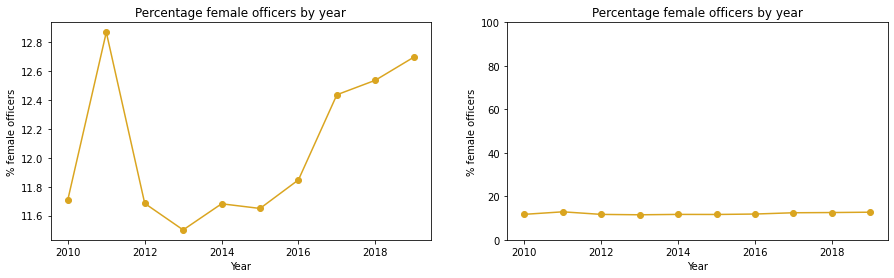

In [42]:
import matplotlib.pyplot as plt
from matplotlib import cm
fig, ax = plt.subplots (1, 2, figsize=(15,4), sharey = False)
ax[0].plot(officer_gender_demo_by_year.index, officer_gender_demo_by_year["Percentage Female Officers"],marker="o",color = "goldenrod")
ax[1].plot(officer_gender_demo_by_year.index, officer_gender_demo_by_year["Percentage Female Officers"],marker="o",color = "goldenrod")
ax[0].set_title("Percentage female officers by year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("% female officers")
ax[1].set_ylim([0, 100])
ax[1].set_title("Percentage female officers by year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("% female officers")
plt.show()
fig.savefig("percent_female_officers_by_year.png")

The shape of this plot is nearly identical to the one for all female employees, although the percentages are much lower.

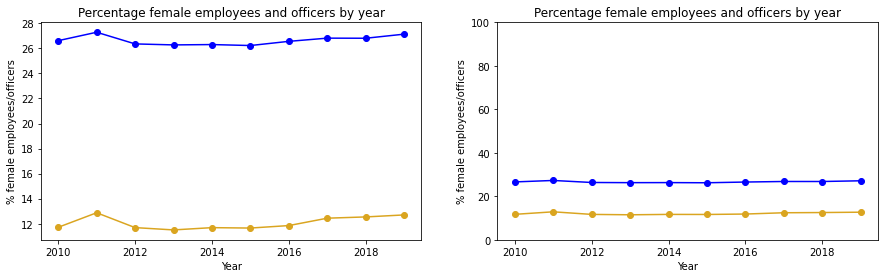

In [43]:
fig, ax = plt.subplots (1, 2, figsize=(15,4), sharey = False)
ax[0].plot(employment_gender_demo_by_year.index, employment_gender_demo_by_year["Percentage Female Employees"],marker="o",color = "b")
ax[0].plot(officer_gender_demo_by_year.index, officer_gender_demo_by_year["Percentage Female Officers"],marker="o",color = "goldenrod")
ax[1].plot(employment_gender_demo_by_year.index, employment_gender_demo_by_year["Percentage Female Employees"],marker="o",color = "b")
ax[1].plot(officer_gender_demo_by_year.index, officer_gender_demo_by_year["Percentage Female Officers"],marker="o",color = "goldenrod")
ax[0].set_title("Percentage female employees and officers by year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("% female employees/officers")
ax[1].set_ylim([0, 100])
ax[1].set_title("Percentage female employees and officers by year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("% female employees/officers")
plt.show()
fig.savefig("percent_female_employees_and_officers_by_year.png")

In [44]:
officer_data_grouped_by_state_and_year = employment_data.groupby(["state_abbr", "data_year"])

sum_female_officers_by_state_and_year = officer_data_grouped_by_state_and_year["female_officer_ct"].sum()

sum_male_officers_by_state_and_year = officer_data_grouped_by_state_and_year["male_officer_ct"].sum()

sum_officers_by_state_and_year = sum_female_officers_by_state_and_year + sum_male_officers_by_state_and_year

percent_female_officers_by_state_and_year = sum_female_officers_by_state_and_year / sum_officers_by_state_and_year * 100

officer_gender_demo_by_state_and_year = pd.DataFrame({"Total Female Officers":sum_female_officers_by_state_and_year,
                                               "Total Male Officers":sum_male_officers_by_state_and_year,
                                               "Total Officers":sum_officers_by_state_and_year,
                                               "Percentage Female Officers":percent_female_officers_by_state_and_year})

officer_gender_demo_by_state_and_year.index.name = None

officer_gender_demo_by_state_and_year.style.format({"Percentage Female Officers":"{:.2f}"})

## Police Officer Gender vs. Arrests
Similar to the employee data, I initially found an insignificant negativce correlation between female officer percentage and arrests. However, the lengths of the arrays did not match, either, so I excluded the missing Florida data before calculating more statistics.

In [45]:
new_corr_officer_gender_vs_arrests = new_grouped_crime_df["value"].corr(officer_gender_demo_by_state_and_year["Percentage Female Officers"], method="pearson")
print(new_corr_officer_gender_vs_arrests)

-0.007608844764869189


In [46]:
print(len(new_grouped_crime_df))
print(len(officer_gender_demo_by_state_and_year))

490
500


In [47]:
new_gender_officer_df=officer_gender_demo_by_state_and_year.drop(index="FL",level=0)
print(len(new_gender_officer_df['Percentage Female Officers']))
print(len(new_grouped_crime_df["value"]))

490
490


In [48]:
c = new_grouped_crime_df["value"]
d = new_gender_officer_df['Percentage Female Officers']
stats.pearsonr(c, d)

(0.2639016593505953, 2.9876113905938354e-09)

The new correlation coefficient shifted again to show a weak positive correlation (approx. 0.26), and the p-value of is even closer to zero (approx. 2.99 x 10^-9).

# Crime Type Data
We performed another set of API calls to access a data set showing different categories of offenses and "cleared" versus total offenses. 

Note: This set of API calls takes forever, but it was the only way I could find to do it. One issue is that if you try to request the year range 2010 to 2019, it only returns 2010.

In [49]:
import itertools
#base url
base_url = "https://api.usa.gov/crime/fbi/sapi/"
#Create a list of states in order to request data from each state
stateAbbr = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
offense = ["violent-crime", "property-crime"]
year = ['2010', "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", '2019']

#create an empty dataframe
summarized_crime_type_data = pd.DataFrame(columns = [])

#Create a for loop to request data for each state and for each variable for the offense that we would like to look at.
for i,j,k in itertools.product(stateAbbr, offense, year):
    desired_endpoint = "api/summarized/state/" + i + "/" + j + "/" + k + "/" + k
    req = requests.get(base_url + desired_endpoint + "?api_key=" + API_KEY).json()
    new = pd.DataFrame(req["results"])
    #Create new columns in the dataframe so that we know what data corresponds to each state and variable.
    new["State"] = i
    new["Offense type"] = j
    new["Year"] = k
    #Append the data from each request to the dataframe
    summarized_crime_type_data = summarized_crime_type_data.append(new)

In [50]:
summarized_crime_type_data_df = pd.DataFrame(summarized_crime_type_data)

In [51]:
summarized_crime_type_data_df

,ori,data_year,offense,state_abbr,cleared,actual,State,Offense type,Year
0,AL0010000,2010,violent-crime,AL,26,349,AL,violent-crime,2010
1,AL0010100,2010,violent-crime,AL,53,289,AL,violent-crime,2010
2,AL0010200,2010,violent-crime,AL,0,1343,AL,violent-crime,2010
3,AL0010400,2010,violent-crime,AL,21,105,AL,violent-crime,2010
4,AL0010500,2010,violent-crime,AL,12,30,AL,violent-crime,2010
...,...,...,...,...,...,...,...,...,...
15,WY0060300,2019,property-crime,WY,1,4,WY,property-crime,2019
16,WY0070000,2019,property-crime,WY,74,183,WY,property-crime,2019
17,WY0070100,2019,property-crime,WY,53,253,WY,property-crime,2019
18,WY0070200,2019,property-crime,WY,157,426,WY,property-crime,2019


## Percentage of Crimes Cleared
Next, we decided to look at what percentage of crimes were "cleared."

"In the FBI’s Uniform Crime Reporting (UCR) Program, law enforcement agencies can clear, or “close,” offenses in one of two ways:  by arrest or by exceptional means."

To clear a case by arrest, the three conditions that must be met are that at least one person has been 

    - arrested,
    - charged with the commission of the offense, and
    - turned over to the court for prosecution. 

To clear a case by exceptional means, the agency must have

    - identified the offender; 
    - gathered enough evidence to arrest, charge, and turn over the offender for prosecution; 
    - identified the offender’s exact location; and 
    - encountered a circumstance outside the agency's control that prohibits them from arresting, charging, and prosecuting the offender.
 
(https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/topic-pages/clearances)
### Property Crime vs. Violent Crime
We were interested in looking at the percentage of property crimes cleared and the percentage of violent crimes cleared.

In [52]:
crime_type_grp = summarized_crime_type_data_df.groupby("offense")

sum_cleared_crimes = crime_type_grp["cleared"].sum()

sum_actual_crimes = crime_type_grp["actual"].sum()

percent_cleared_crimes = sum_cleared_crimes / sum_actual_crimes * 100



crimes_cleared_by_type = pd.DataFrame({"Total Cleared Crimes":sum_cleared_crimes,
                                            "Total Actual Crimes":sum_actual_crimes,
                                            "Percentage of Crimes Cleared":percent_cleared_crimes})

crimes_cleared_by_type.index.name = "Crime Type"

crimes_cleared_by_type.style.format({"Percentage of Crimes Cleared":"{:.2f}"})

,Total Cleared Crimes,Total Actual Crimes,Percentage of Crimes Cleared
Crime Type,,,
property-crime,1104289,5936936,18.60
violent-crime,411849,915125,45.00


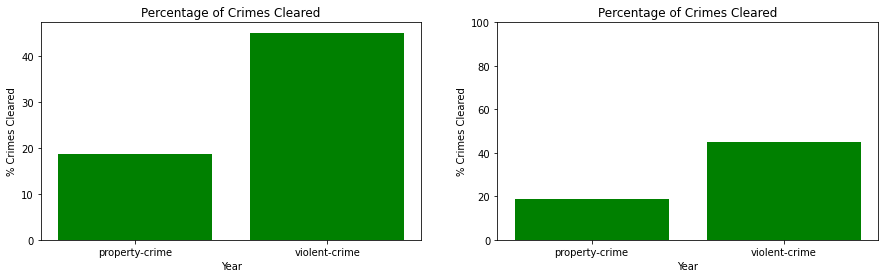

In [53]:
fig, ax = plt.subplots (1, 2, figsize=(15,4), sharey = False)
ax[0].bar(crimes_cleared_by_type.index, crimes_cleared_by_type["Percentage of Crimes Cleared"],color = "g")
ax[1].bar(crimes_cleared_by_type.index, crimes_cleared_by_type["Percentage of Crimes Cleared"],color = "g")
ax[0].set_title("Percentage of Crimes Cleared")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("% Crimes Cleared")
ax[1].set_ylim([0, 100])
ax[1].set_title("Percentage of Crimes Cleared")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("% Crimes Cleared")
plt.show()
fig.savefig("percent_crimes_cleared_by_type_and_year.png")

The percentage of violent crimes cleared was more than double the percentage of property crimes cleared. There seem to be two likely reasons for this:

    (1) Violent crimes are likely given a higher priority (i.e., more resources are put toward clearing them).
    (2) It seems likely that victims of violent crime saw the offender, whereas victims of property crime are less likely to have actully witnessed the crime.
    
These are just assumptions, though!
### Percentage of Crimes Cleared by Year

In [55]:
summarized_crime_type_data_by_year = summarized_crime_type_data_df.groupby("data_year")


sum_cleared_crimes_by_year = summarized_crime_type_data_by_year["cleared"].sum()

sum_actual_crimes_by_year = summarized_crime_type_data_by_year["actual"].sum()

percent_cleared_crimes_by_year = sum_cleared_crimes_by_year / sum_actual_crimes_by_year * 100




crimes_cleared_stats_by_year = pd.DataFrame({"Total Cleared Crimes":sum_cleared_crimes_by_year,
                                            "Total Actual Crimes":sum_actual_crimes_by_year,
                                            "Percentage of Crimes Cleared":percent_cleared_crimes_by_year})

crimes_cleared_stats_by_year.index.name = "Year"

crimes_cleared_stats_by_year.style.format({"Percentage of Crimes Cleared":"{:.2f}"})

,Total Cleared Crimes,Total Actual Crimes,Percentage of Crimes Cleared
Year,,,
2010,153383,715935,21.42
2011,152482,714591,21.34
2012,160751,721237,22.29
2013,164032,696031,23.57
2014,158310,656321,24.12
2015,155397,679524,22.87
2016,152695,701226,21.78
2017,150273,701015,21.44
2018,137770,660097,20.87


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
fig, ax = plt.subplots (1, 2, figsize=(15,4), sharey = False)
ax[0].plot(crimes_cleared_stats_by_year.index, crimes_cleared_stats_by_year["Percentage of Crimes Cleared"],marker="v",color = "r")
ax[1].plot(crimes_cleared_stats_by_year.index, crimes_cleared_stats_by_year["Percentage of Crimes Cleared"],marker="v",color = "r")
ax[0].set_title("Percentage of Crimes Cleared")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("% Crimes Cleared")
ax[1].set_ylim([0, 100])
ax[1].set_title("Percentage of Crimes Cleared")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("% Crimes Cleared")
plt.show()
fig.savefig("percent_crimes_cleared_by_year.png")

The percentage of crimes that were peaked in 2014, but the up/down trend shown in the first plot, but the trend appears less dramatic when the percentage scale on the y-axis is extended from 0 to 100.
## Crime Clearances vs. Gender
Next, we looked at the relationship between the percentage of femle officers and the percentage of offenses cleared. The correlation coefficient shows a moderate negative correlation between the two.

In [ ]:
new_corr_officer_gender_vs_cleared = crimes_cleared_stats_by_year["Percentage of Crimes Cleared"].corr(officer_gender_demo_by_year["Percentage Female Officers"], method="pearson")
print(new_corr_officer_gender_vs_cleared)

In [ ]:
print(len(crimes_cleared_stats_by_year["Percentage of Crimes Cleared"]))
print(len(officer_gender_demo_by_year["Percentage Female Officers"]))

However, it may be useful to include the year column in the crime type data set to try to match the lengths and perform a better analysis.

In [ ]:
crime_type_data_by_state_and_year = summarized_crime_type_data_df.groupby(["state_abbr", "data_year"])

sum_cleared_crimes_by_state_and_year = crime_type_data_by_state_and_year["cleared"].sum()

sum_actual_crimes_by_state_and_year = crime_type_data_by_state_and_year["actual"].sum()

percent_cleared_crimes_by_state_and_year = sum_cleared_crimes_by_state_and_year / sum_actual_crimes_by_state_and_year * 100



crimes_cleared_stats_by_state_and_year = pd.DataFrame({"Total Cleared Crimes":sum_cleared_crimes_by_state_and_year,
                                            "Total Actual Crimes":sum_actual_crimes_by_state_and_year,
                                            "Percentage of Crimes Cleared":percent_cleared_crimes_by_state_and_year})

crimes_cleared_stats_by_state_and_year.index.name = "Year"

crimes_cleared_stats_by_state_and_year.style.format({"Percentage of Crimes Cleared":"{:.2f}"})

In [ ]:
print(len(officer_gender_demo_by_state_and_year['Percentage Female Officers']))
print(len(crimes_cleared_stats_by_state_and_year["Percentage of Crimes Cleared"]))

In [ ]:
e = officer_gender_demo_by_state_and_year['Percentage Female Officers']
f = crimes_cleared_stats_by_state_and_year["Percentage of Crimes Cleared"]
stats.pearsonr(e, f)

These statistics show an insignificant positive correlation between crime clearances and percentage of female officers. The p-value is very high, which may indicate that the correlation coefficient is not very accurate. Nevertheless, it seems like there is likley little or no correlation between crime clearance rates and police officer gender.
# Gender vs. Offense Summary
We did not find significant correlations between police employee or officer gender and arrests or clearances rates. It would be interesting to look specifically at clearance rates of property crime and violent crime separately if we continue to analyze this data. However, the FBI data sets are not well organized, it was difficult to understand what each data set was for, and there were all sorts of issues with errors and missing data, so much of our time was spent trying to find data sets that were actually usable.